In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
from skimage import data

In [2]:
df = pd.read_csv('./data/sample.csv')

In [3]:
df

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,...,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,118.0,No co-applicant,No co-applicant,No co-applicant,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Affiliate institution,109000.0,300,1470.0,1337.0,17.110001,4448.0
175858,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,27.0,No co-applicant,No co-applicant,No co-applicant,Monroe County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69700.0,88,1719.0,1490.0,16.040001,4658.0
175859,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,215.0,Not Hispanic or Latino,White,Female,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109000.0,205,1547.0,1455.0,7.730000,4671.0
175860,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,116.0,No co-applicant,No co-applicant,No co-applicant,Rockland County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71300.0,200,1743.0,1534.0,19.969999,5484.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175862 entries, 0 to 175861
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken_name               175862 non-null  object 
 1   agency_name                     175862 non-null  object 
 2   applicant_ethnicity_name        175862 non-null  object 
 3   applicant_race_name_1           175862 non-null  object 
 4   applicant_sex_name              175862 non-null  object 
 5   applicant_income_000s           151344 non-null  float64
 6   co_applicant_ethnicity_name     175862 non-null  object 
 7   co_applicant_race_name_1        175862 non-null  object 
 8   co_applicant_sex_name           175862 non-null  object 
 9   county_name                     175377 non-null  object 
 10  denial_reason_name_1            23067 non-null   object 
 11  denial_reason_name_2            4650 non-null    object 
 12  denial_reason_na

In [5]:
# Creation of a factor 'income_loan_ratio': Is the reason for loan approval a mishap between the applicant's income and the loan hight? 

df['income_loan_ratio'] = df.loan_amount_000s / df.applicant_income_000s
df

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,income_loan_ratio
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,...,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0,1.335227
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,...,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0,2.037736
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,...,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0,2.955157
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,...,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0,2.395349
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,...,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,118.0,No co-applicant,No co-applicant,No co-applicant,Nassau County,...,Preapproval was requested,One-to-four family dwelling (other than manufa...,Affiliate institution,109000.0,300,1470.0,1337.0,17.110001,4448.0,2.542373
175858,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,27.0,No co-applicant,No co-applicant,No co-applicant,Monroe County,...,Preapproval was not requested,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69700.0,88,1719.0,1490.0,16.040001,4658.0,3.259259
175859,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,215.0,Not Hispanic or Latino,White,Female,Nassau County,...,Preapproval was not requested,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109000.0,205,1547.0,1455.0,7.730000,4671.0,0.953488
175860,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,116.0,No co-applicant,No co-applicant,No co-applicant,Rockland County,...,Not applicable,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71300.0,200,1743.0,1534.0,19.969999,5484.0,1.724138


In [6]:
# Checking for null values

null_df = pd.DataFrame({'null_values': df.isna().sum().sort_values(ascending = False), 'percentage': round((df.isna().sum())/(df.shape[0])*(100),2)}).reset_index()
null_df

,index,Null_Values,Percentage
0,action_taken_name,0,0.00
1,agency_name,0,0.00
2,applicant_ethnicity_name,0,0.00
3,applicant_income_000s,24518,13.94
4,applicant_race_name_1,0,0.00
5,applicant_sex_name,0,0.00
6,co_applicant_ethnicity_name,0,0.00
7,co_applicant_race_name_1,0,0.00
8,co_applicant_sex_name,0,0.00
9,county_name,485,0.28


<AxesSubplot:>

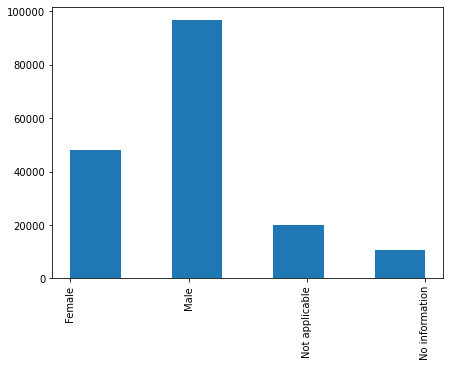

In [94]:
# OVERVIEW
# Sex / gender distribution among applicants

df.applicant_sex_name.hist(bins = 7, figsize = [7 , 5], xrot = 90, grid = False)

In [17]:
# Creating a column with 1 for any kind of loan approval and 0 for all loan denials and file closures.

df['loan_approved'] = np.where(
   (df.action_taken_name == 'Loan originated') | (df.action_taken_name == 'Loan purchased by the institution') | (df.action_taken_name == 'Application approved but not accepted'), 1, 0)

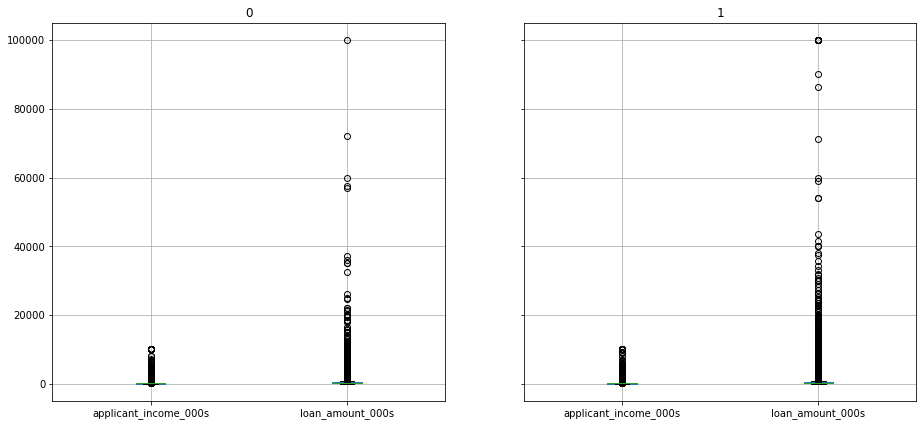

In [18]:
# OVERVIEW 
# Approved (1) or denied (0) loan applications

ax = df[['applicant_income_000s', 'loan_amount_000s']].groupby(df.loan_approved).boxplot(figsize=[15,7])
plt.show()

In [7]:
# OVERVIEW: 
# Financial basics of loan applicants by bank decision 

df[(df.action_taken_name == 'Application denied by financial institution') | (df.action_taken_name == 'Preapproval request denied by financial institution')].describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,income_loan_ratio
count,29244.000000,31745.000000,32008.000000,31705.000000,31694.000000,31742.000000,31742.000000,29244.000000
mean,115.093113,77621.351394,275.467352,1495.708879,1152.899634,33.095910,4644.759089,3.119786
std,249.194609,16087.468853,941.591117,781.144498,609.542490,31.583308,1875.122189,18.104072
min,1.000000,57200.000000,1.000000,6.000000,5.000000,0.340000,1.000000,0.002347
25%,47.000000,69000.000000,63.750000,944.000000,666.000000,8.080000,3347.000000,0.976008
50%,75.000000,71300.000000,161.000000,1479.000000,1137.000000,19.690001,4441.000000,2.127562
75%,120.000000,82700.000000,326.000000,1999.000000,1595.000000,50.240002,5766.000000,3.491827
max,9999.000000,109000.000000,99999.000000,6345.000000,6454.000000,100.000000,26588.000000,1444.000000


In [8]:
df[df.action_taken_name == 'Loan originated'].describe()

# There seems to be a higher probability to get a loan if the minority rate is lower.

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,income_loan_ratio
count,84383.000000,90907.000000,90982.000000,90782.000000,90841.00000,90901.000000,90901.000000,84383.000000
mean,145.646042,77781.219268,353.681519,1544.497048,1252.58030,25.718360,4785.476584,2.382086
std,274.387826,16126.755891,1382.563118,797.626202,600.66208,26.489802,1864.266387,9.533025
min,1.000000,57200.000000,1.000000,6.000000,5.00000,0.340000,5.000000,0.004847
25%,60.000000,69000.000000,103.000000,1008.000000,804.00000,7.050000,3494.000000,1.271676
50%,93.000000,71300.000000,204.000000,1564.000000,1235.00000,15.400000,4604.000000,2.097561
75%,146.000000,82700.000000,368.000000,2033.000000,1664.00000,32.470001,5907.000000,3.055556
max,9999.000000,109000.000000,99999.000000,6345.000000,6454.00000,99.930000,26588.000000,2647.000000


In [9]:
df[df.action_taken_name == 'Application withdrawn by applicant'].describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,income_loan_ratio
count,14054.000000,15591.000000,15765.000000,15557.000000,15574.000000,15590.000000,15590.000000,14054.000000
mean,170.381457,79422.968379,396.556930,1459.669088,1178.459612,32.940901,4777.461193,2.958020
std,322.104412,16293.738384,1183.312239,820.917433,623.506721,30.337942,1947.699435,17.595867
min,1.000000,57200.000000,1.000000,6.000000,5.000000,0.340000,25.000000,0.008403
25%,65.000000,71300.000000,131.000000,882.000000,698.000000,9.990000,3425.000000,1.417978
50%,100.000000,71300.000000,250.000000,1449.000000,1159.000000,20.790001,4573.500000,2.314815
75%,164.750000,82700.000000,409.000000,1974.000000,1628.000000,46.520000,5963.000000,3.413519
max,9999.000000,109000.000000,72164.000000,6345.000000,6454.000000,99.930000,26588.000000,2000.000000


In [10]:
df[df.action_taken_name == 'Loan purchased by the institution'].describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,income_loan_ratio
count,12568.000000,24670.000000,24682.000000,24649.000000,24657.000000,24668.000000,24668.000000,12568.000000
mean,109.417568,78709.314957,276.697553,1488.862104,1199.186803,32.226739,4730.391641,2.822695
std,108.993442,16250.261537,455.546614,748.805920,615.654652,30.938615,1853.716414,2.284732
min,4.000000,57200.000000,1.000000,6.000000,4.000000,0.340000,24.000000,0.001066
25%,60.000000,69700.000000,123.000000,955.000000,717.000000,8.540000,3430.000000,1.763449
50%,87.000000,71300.000000,225.000000,1486.000000,1180.000000,18.830000,4559.000000,2.525158
75%,127.000000,82700.000000,360.000000,1990.000000,1639.000000,46.430000,5894.000000,3.516263
max,4025.000000,109000.000000,25165.000000,6345.000000,6454.000000,99.930000,26588.000000,113.000000


In [11]:
df[df.action_taken_name == 'Application approved but not accepted'].describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,income_loan_ratio
count,5212.000000,5700.000000,5743.000000,5698.000000,5695.000000,5700.000000,5700.000000,5212.000000
mean,156.939371,79216.859649,351.100993,1517.615830,1185.380860,31.766796,4760.453509,2.706461
std,358.034208,16547.303607,703.891329,832.073748,615.252003,30.460323,1875.226594,4.339521
min,1.000000,57200.000000,2.000000,6.000000,10.000000,1.380000,73.000000,0.005637
25%,62.000000,69700.000000,115.000000,936.000000,690.500000,8.270000,3468.000000,1.311475
50%,93.000000,71300.000000,233.000000,1506.500000,1179.000000,19.540001,4559.000000,2.185450
75%,150.000000,82700.000000,385.000000,2016.000000,1640.000000,44.560001,5902.000000,3.333333
max,9999.000000,109000.000000,19000.000000,6345.000000,3415.000000,99.790001,15344.000000,200.000000


In [12]:
df[df.action_taken_name == 'File closed for incompleteness'].describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,income_loan_ratio
count,5883.000000,6565.000000,6682.000000,6560.000000,6559.000000,6565.000000,6565.000000,5883.000000
mean,175.926738,79985.209444,377.027986,1413.077439,1147.211008,35.609933,4740.794364,3.290132
std,366.797077,16711.107237,753.832882,806.308402,630.115775,31.633438,2008.774514,36.690921
min,1.000000,57200.000000,3.000000,6.000000,3.000000,1.220000,82.000000,0.009934
25%,67.000000,71300.000000,140.000000,813.750000,626.000000,10.930000,3388.000000,1.470294
50%,103.000000,71300.000000,265.000000,1404.500000,1132.000000,22.230000,4512.000000,2.382022
75%,165.000000,95200.000000,409.000000,1936.000000,1595.000000,54.860001,5899.000000,3.533333
max,9999.000000,109000.000000,35000.000000,6345.000000,6454.000000,99.930000,26588.000000,2800.000000


In [13]:
# ------------------------------------------------------------------------------------------------------------------
# It seems as if the income-loan-ratio plays a significant role in the lender's decision making.

# The positively decided loan requests correspond to a loan amount of 2.38 times the annual income of the applicant.
# The rejected applications, on the other hand, show 3.12 times the value.
# ------------------------------------------------------------------------------------------------------------------

In [140]:
print('Mean income loan ratio: ', round(df.income_loan_ratio.mean(), 5))
print('Mean income loan ratio - Loan approved: ', round(df[(df.action_taken_name == 'Loan originated') | (df.action_taken_name == 'Application approved but not accepted')]['income_loan_ratio'].mean(), 5))
print('Mean income loan ratio - Loan denied: ', round(df[df.action_taken_name == 'Application denied by financial institution']['income_loan_ratio'].mean(), 5))

Mean income loan ratio:  2.66117
Mean income loan ratio - Loan approved:  2.40096
Mean income loan ratio - Loan denied:  3.11986


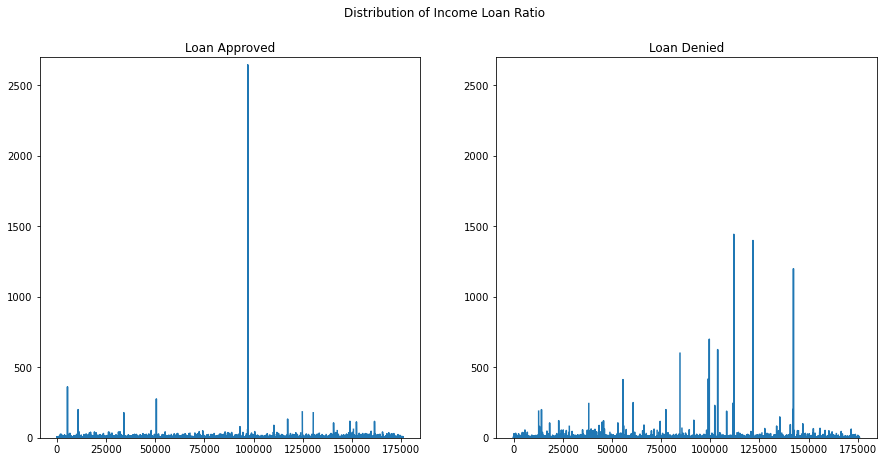

In [112]:
# Distribution of Income Loan Ratio

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,7])
fig.suptitle('Distribution of Income Loan Ratio')
ax1.plot(df[(df.action_taken_name == 'Loan originated') | (df.action_taken_name == 'Application approved but not accepted')]['income_loan_ratio'])
ax1.set_title('Loan Approved')
ax2.plot(df[df.action_taken_name == 'Application denied by financial institution']['income_loan_ratio'])
ax2.set_title('Loan Denied')
ax1.set_ylim(0,2700)
ax2.set_ylim(0,2700)

plt.show()

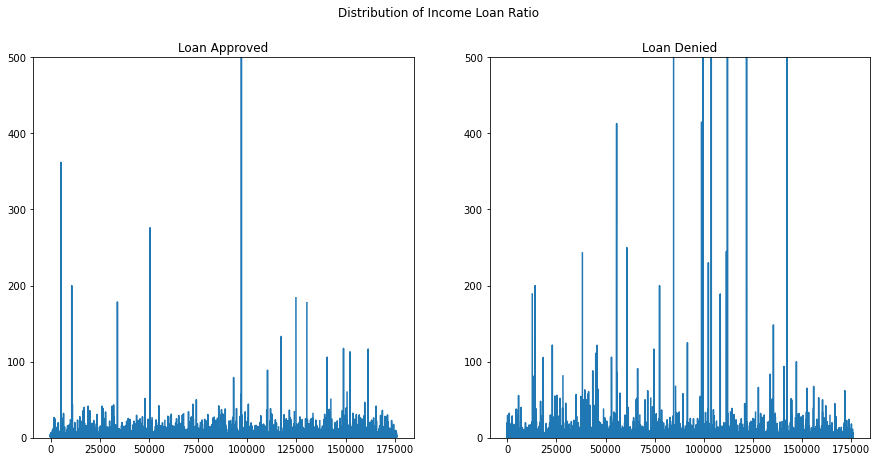

In [115]:
# Closer view

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,7])
fig.suptitle('Distribution of Income Loan Ratio - Extract')
ax1.plot(df[(df.action_taken_name == 'Loan originated') | (df.action_taken_name == 'Application approved but not accepted')]['income_loan_ratio'])
ax1.set_title('Loan Approved')
ax2.plot(df[df.action_taken_name == 'Application denied by financial institution']['income_loan_ratio'])
ax2.set_title('Loan Denied')
ax1.set_ylim(0,500)
ax2.set_ylim(0,500)

plt.show()

In [ ]:
# -------------------------------------------------------------------------------------------
# A high loan income ratio is a reason for loan application rejections - for some applicants.
# Obviously there are more reasons.
# -------------------------------------------------------------------------------------------

In [14]:
df.applicant_ethnicity_name.unique()

# Why is the information whether an applicant is "Hispanic or Latino" so important for the application process?
# Why is the ethnicity / race so important at all? Are there statistics about loan default rates according to ethnicity?

array(['Not Hispanic or Latino', 'Not applicable', 'Hispanic or Latino',
       'Information not provided by applicant in mail, Internet, or telephone application'],
      dtype=object)

In [15]:
# Shortening 'Information not provided by applicant in mail, Internet, or telephone application' in applicant_sex_name

df = df.replace('Information not provided by applicant in mail, Internet, or telephone application', 'No information')

In [142]:
# OVERVIEW
# Applications by sex / gender 
# More details below

pd.DataFrame({'Loan denied': df[df.loan_approved == 0]['loan_approved'].groupby(df.applicant_sex_name).count(),
              'Loan approved': df[df.loan_approved == 1]['loan_approved'].groupby(df.applicant_sex_name).count()})

,Loan denied,Loan approved
applicant_sex_name,,
Female,16625,31405
Male,32280,64659
No information,4950,5776
Not applicable,600,19567


applicant_sex_name
Female            AxesSubplot(0.125,0.125;0.775x0.755)
Male              AxesSubplot(0.125,0.125;0.775x0.755)
No information    AxesSubplot(0.125,0.125;0.775x0.755)
Not applicable    AxesSubplot(0.125,0.125;0.775x0.755)
Name: action_taken_name, dtype: object

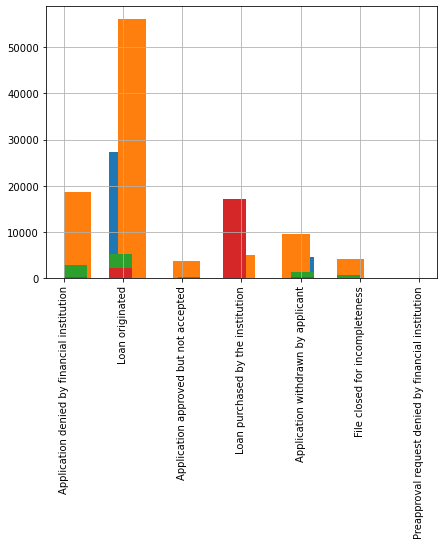

In [20]:
df.action_taken_name.groupby(df.applicant_sex_name).hist(bins = 13, figsize = [7 , 5], xrot = 90)

In [24]:
loan = pd.DataFrame({'total_gender': df.groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'loan_approved': df[df.action_taken_name == 'Loan originated'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'loan_bought': df[df.action_taken_name == 'Loan purchased by the institution'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'approved_not_accepted': df[df.action_taken_name == 'Application approved but not accepted'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'application_witdrawn': df[df.action_taken_name == 'Application withdrawn by applicant'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'file_closed_incompleteness': df[df.action_taken_name == 'File closed for incompleteness'].groupby('applicant_sex_name')['applicant_sex_name'].count(),
                     'loan_denied': (df[(df.action_taken_name == 'Application denied by financial institution') | 
                                    (df.action_taken_name == 'Preapproval request denied by financial institution')].groupby('applicant_sex_name')['applicant_sex_name'].count())}).reset_index()

loan['loan_approved_%'] = round(loan.loan_approved / loan.total_gender * 100, 2)
loan['loan_bought_%'] = round(loan.loan_bought / loan.total_gender * 100, 2)
loan['approved_not_accepted_%'] = round(loan.approved_not_accepted / loan.total_gender * 100, 2)
loan['application_witdrawn_%'] = round(loan.application_witdrawn / loan.total_gender * 100, 2)
loan['file_closed_incompleteness_%'] = round(loan.file_closed_incompleteness / loan.total_gender * 100, 2)
loan['loan_denied_%'] = round(loan.loan_denied / loan.total_gender * 100, 2)

loan = loan[['applicant_sex_name', 'total_gender', 'loan_approved', 'loan_approved_%', 'loan_bought', 'loan_bought_%', 'approved_not_accepted', 'approved_not_accepted_%', 'application_witdrawn', 'application_witdrawn_%', 'loan_denied', 'loan_denied_%', 'file_closed_incompleteness', 'file_closed_incompleteness_%']]

loan

#-----------------------------------------------------------------------------------------------------------------
# There seems to be no (serious) gender bias in the loan approval rates. 
# The denial rate with women is only 2.1 percent points higher than with men. This can happen for various reasons.
#-----------------------------------------------------------------------------------------------------------------

,applicant_sex_name,total_gender,loan_approved,loan_approved_%,loan_bought,loan_bought_%,approved_not_accepted,approved_not_accepted_%,application_witdrawn,application_witdrawn_%,loan_denied,loan_denied_%,file_closed_incompleteness,file_closed_incompleteness_%
0,Female,48030,27415,57.08,2404,5.01,1586,3.30,4559,9.49,10232,21.30,1834,3.82
1,Male,96939,56031,57.80,4965,5.12,3663,3.78,9610,9.91,18595,19.18,4075,4.20
2,No information,10726,5311,49.52,104,0.97,361,3.37,1379,12.86,2833,26.41,738,6.88
3,Not applicable,20167,2225,11.03,17209,85.33,133,0.66,217,1.08,348,1.73,35,0.17


In [25]:
# SEX / GENDER:
# Does the data reveal gender biases in decision making?
#-------------------------------------------------------

decisions = sorted(df.action_taken_name.unique())
dec = pd.DataFrame(decisions)

def bank_action(task):
    calc1, calc2, calc3 = [],[],[]

    if task == 1: # Total no of applications by gender
        for i in decisions:
            calc1.append(df[df.action_taken_name == i]['action_taken_name'].groupby(df.applicant_sex_name).count())
            df_calc1 = pd.DataFrame(calc1).reset_index(drop = True)
        result_calc1 = pd.concat([dec, df_calc1.fillna(0).astype(int)], axis = 1)
        result_calc1.columns = ['Total no of applications by gender', 'Female', 'Male', 'No information', 'Not applicable / diverse']
        result_calc1['total'] = list(df.applicant_sex_name.groupby(df.action_taken_name).count())
        return(result_calc1)
    elif task == 2: # Share of all applications by gender in %
        for i in decisions:
            calc2.append(round(df[df.action_taken_name == i]['action_taken_name'].groupby(df.applicant_sex_name).count() / df.shape[0] * 100, 2))
            df_calc2 = pd.DataFrame(calc2).reset_index(drop = True)
        result_calc2 = pd.concat([dec, df_calc2.fillna(0)], axis = 1)
        result_calc2.columns = ['Share of all applications by gender in %', 'Female', 'Male', 'No information', 'Not applicable / diverse']
        return(result_calc2)
    elif task == 3: # Share of gender-specific applications in %
        for i in decisions:
            calc3.append(round(df[df.action_taken_name == i]['action_taken_name'].groupby(df.applicant_sex_name).count() / df.applicant_sex_name.groupby(df.applicant_sex_name).count() * 100, 2))
            df_calc3 = pd.DataFrame(calc3).reset_index(drop = True)
        result_calc3 = pd.concat([dec, df_calc3.fillna(0)], axis = 1)
        result_calc3.columns = ['Share of applications by gender-specific total in %', 'Female', 'Male', 'No information', 'Not applicable / diverse']
        result_calc3['Mean'] = list(round(df.applicant_sex_name.groupby(df.action_taken_name).count() / df.applicant_sex_name.count() * 100, 2))
        return(result_calc3)

In [26]:
bank_action(1)

,Total no of applications by gender,Female,Male,No information,Not applicable / diverse,total
0,Application approved but not accepted,1586,3663,361,133,5743
1,Application denied by financial institution,10232,18592,2833,348,32005
2,Application withdrawn by applicant,4559,9610,1379,217,15765
3,File closed for incompleteness,1834,4075,738,35,6682
4,Loan originated,27415,56031,5311,2225,90982
5,Loan purchased by the institution,2404,4965,104,17209,24682
6,Preapproval request denied by financial instit...,0,3,0,0,3


In [27]:
bank_action(2)

,Share of all applications by gender in %,Female,Male,No information,Not applicable / diverse
0,Application approved but not accepted,0.90,2.08,0.21,0.08
1,Application denied by financial institution,5.82,10.57,1.61,0.20
2,Application withdrawn by applicant,2.59,5.46,0.78,0.12
3,File closed for incompleteness,1.04,2.32,0.42,0.02
4,Loan originated,15.59,31.86,3.02,1.27
5,Loan purchased by the institution,1.37,2.82,0.06,9.79
6,Preapproval request denied by financial instit...,0.00,0.00,0.00,0.00


In [28]:
bank_action(3)

,Share of applications by gender-specific total in %,Female,Male,No information,Not applicable / diverse,Mean
0,Application approved but not accepted,3.30,3.78,3.37,0.66,3.27
1,Application denied by financial institution,21.30,19.18,26.41,1.73,18.20
2,Application withdrawn by applicant,9.49,9.91,12.86,1.08,8.96
3,File closed for incompleteness,3.82,4.20,6.88,0.17,3.80
4,Loan originated,57.08,57.80,49.52,11.03,51.73
5,Loan purchased by the institution,5.01,5.12,0.97,85.33,14.03
6,Preapproval request denied by financial instit...,0.00,0.00,0.00,0.00,0.00


In [29]:
#-----------------------------------------------------------------------------------------------------------------
# There seems to be no (serious) sex / gender bias in the loan approval rates. 
# The denial rate with women is only 2.1 percent points higher than with men. This can happen for various reasons.
#-----------------------------------------------------------------------------------------------------------------

In [21]:
# DENIAL REASONS

den_loan = df[df.action_taken_name == 'Application denied by financial institution']['action_taken_name'].count() + df[df.action_taken_name == 'Preapproval request denied by financial institution']['action_taken_name'].count()
den_reason_1 = df.denial_reason_name_1.count()

print('Number of denied loan applications: ', den_loan)
print('Number of filled in denial reasons: ', den_reason_1)
print('Difference: ', den_loan - den_reason_1)

Number of denied loan applications:  32008
Number of filled in denial reasons:  23067
Difference:  8941


In [22]:
# Which are the main reasons for a loan application rejection?

pd.DataFrame({'d_reason_1': df.denial_reason_name_1.groupby(df.denial_reason_name_1).count(),
              'd_reason_2': df.denial_reason_name_2.groupby(df.denial_reason_name_2).count(),
              'd_reason_3': df.denial_reason_name_3.groupby(df.denial_reason_name_3).count(),
              'total': df.denial_reason_name_1.groupby(df.denial_reason_name_1).count() + df.denial_reason_name_2.groupby(df.denial_reason_name_2).count() + df.denial_reason_name_3.groupby(df.denial_reason_name_3).count()})

# The reasons options are redundand, but the bank clerk doesn't have to fill them in as the null value rates show.

,d_reason_1,d_reason_2,d_reason_3,total
Collateral,4524,537,113,5174
Credit application incomplete,2855,228,34,3117
Credit history,5544,1115,166,6825
Debt-to-income ratio,6402,935,134,7471
Employment history,260,203,16,479
"Insufficient cash (downpayment, closing costs)",559,513,117,1189
Mortgage insurance denied,51,26,5,82
Other,2068,761,271,3100
Unverifiable information,804,332,64,1200


In [23]:
# Which are the main reasons for a loan application rejection?

pd.DataFrame({'d_reason_1': df.denial_reason_name_1.groupby(df.denial_reason_name_1).count(),
              'd_reason_2': df.denial_reason_name_2.groupby(df.denial_reason_name_2).count(),
              'd_reason_3': df.denial_reason_name_3.groupby(df.denial_reason_name_3).count(),
              'total': df.denial_reason_name_1.groupby(df.denial_reason_name_1).count() + df.denial_reason_name_2.groupby(df.denial_reason_name_2).count() + df.denial_reason_name_3.groupby(df.denial_reason_name_3).count()})

# The reasons options are redundand, but the bank clerk doesn't have to fill them in as the null value rates show.

,d_reason_1,d_reason_2,d_reason_3,total
Collateral,4524,537,113,5174
Credit application incomplete,2855,228,34,3117
Credit history,5544,1115,166,6825
Debt-to-income ratio,6402,935,134,7471
Employment history,260,203,16,479
"Insufficient cash (downpayment, closing costs)",559,513,117,1189
Mortgage insurance denied,51,26,5,82
Other,2068,761,271,3100
Unverifiable information,804,332,64,1200


In [30]:
# COUNTIES

# Distribution of counties containing the property

df.groupby('county_name')['county_name'].count().sort_values(ascending=False)

county_name
Suffolk County      18063
Nassau County       15431
Queens County       15142
Kings County        13436
Erie County         10134
                    ...  
Delaware County       367
Schoharie County      358
Yates County          344
Schuyler County       255
Hamilton County        91
Name: county_name, Length: 62, dtype: int64

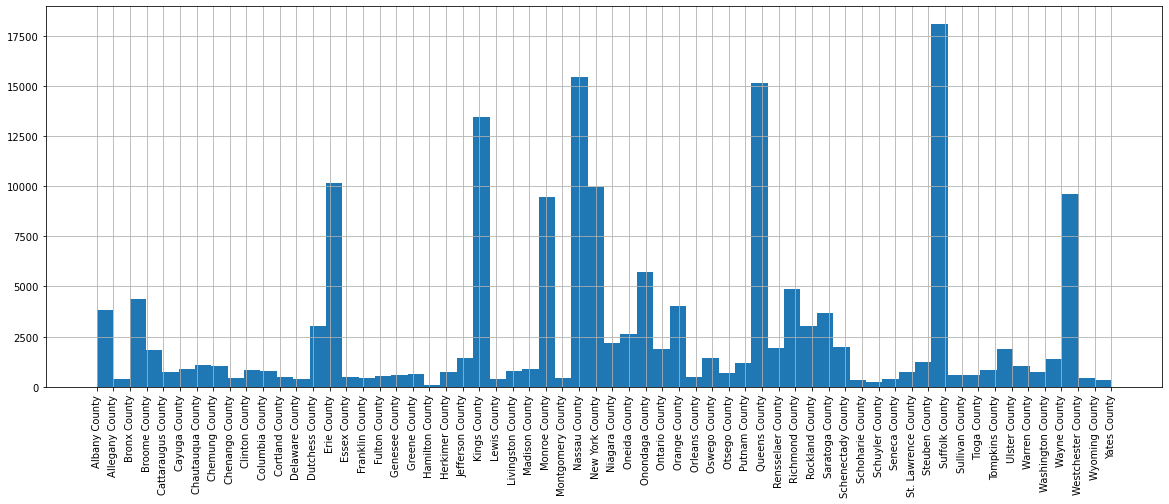

In [31]:
ax = df['county_name'].sort_values().hist(bins = pd.Series(df.county_name.unique()).count(), figsize=[20,7], xrot = 90)
plt.show()

In [32]:
# Applications by county and bank decisions - total numbers

cou = []

for i in decisions:
    cou.append(df[df.action_taken_name == i]['action_taken_name'].groupby(df.county_name).count())
    df_cou = pd.DataFrame(cou).reset_index(drop = True)
result_county = pd.concat([dec, df_cou.fillna(0).astype(int)], axis = 1)
result_county = result_county.transpose()

# Sorting columns, changing column names and resetting index after transposition
result_county = result_county[[4, 0, 5, 2, 3, 6, 1]]
result_county.columns = result_county.iloc[0]
result_county = result_county.drop(result_county.index[0]).reset_index()
result_county.rename(columns = {'index':'County'}, inplace = True)

# Applications by county and bank decisions - in percent by county 

cou_pc = []

for i in decisions:
    cou_pc.append(round(df[df.action_taken_name == i]['action_taken_name'].groupby(df.county_name).count() / df.county_name.groupby(df.county_name).count() * 100, 2))
    df_cou_pc = pd.DataFrame(cou_pc).reset_index(drop = True)
result_county_pc = pd.concat([dec, df_cou_pc.fillna(0)], axis = 1)
result_county_pc = result_county_pc.transpose()

# Sorting columns, changing column names and resetting index after transposition
result_county_pc = result_county_pc[[4, 0, 5, 2, 3, 6, 1]]
result_county_pc.columns = result_county_pc.iloc[0]
result_county_pc = result_county_pc.drop(result_county_pc.index[0]).reset_index()
result_county_pc.rename(columns = {'index':'County2', 'Loan originated':'Lo %', 'Application approved but not accepted': 'Aabna %', 'Loan purchased by the institution': 'Lpbti &',
                                   'Application withdrawn by applicant': 'Awby %', 'File closed for incompleteness': 'Fcfi %', 
                                   'Preapproval request denied by financial institution': 'Prdbfi %', 'Application denied by financial institution': 'Adbfi %'}, inplace = True)

# Combining the dataframes with total numbers and percentages

df_county = pd.concat([result_county, result_county_pc], axis = 1)
df_county = df_county.drop('County2', axis = 1)
df_county = df_county[['County', 'Loan originated', 'Lo %', 'Application approved but not accepted', 'Aabna %', 'Loan purchased by the institution', 'Lpbti &',
                       'Application withdrawn by applicant', 'Awby %', 'File closed for incompleteness', 'Fcfi %', 
                       'Preapproval request denied by financial institution', 'Prdbfi %', 'Application denied by financial institution', 'Adbfi %']]

# Adding some financial information

df_median_income = pd.DataFrame(df.hud_median_family_income.groupby(df.county_name).min()).reset_index()
df_income_mean = pd.DataFrame(df.applicant_income_000s.groupby(df.county_name).mean()).reset_index()
df_loan_amount_mean = pd.DataFrame(df.loan_amount_000s.groupby(df.county_name).mean()).reset_index()

df_county = pd.concat([df_county, df_median_income.hud_median_family_income, df_income_mean.applicant_income_000s, df_loan_amount_mean.loan_amount_000s], axis = 1)

df_county

,County,Loan originated,Lo %,Application approved but not accepted,Aabna %,Loan purchased by the institution,Lpbti &,Application withdrawn by applicant,Awby %,File closed for incompleteness,Fcfi %,Preapproval request denied by financial institution,Prdbfi %,Application denied by financial institution,Adbfi %,hud_median_family_income,applicant_income_000s,loan_amount_000s
0,Albany County,2106,55.26,140,3.67,536,14.06,363,9.53,102,2.68,0,0,564,14.8,82700.0,98.771796,196.415114
1,Allegany County,235,60.72,9,2.33,19,4.91,21,5.43,11,2.84,0,0,92,23.77,60000.0,64.361111,57.899225
2,Bronx County,1686,38.48,144,3.29,763,17.42,510,11.64,225,5.14,0,0,1053,24.04,71300.0,102.991045,469.575668
3,Broome County,985,54.21,62,3.41,246,13.54,133,7.32,32,1.76,0,0,359,19.76,66400.0,74.174714,101.166758
4,Cattaraugus County,424,57.84,25,3.41,77,10.5,34,4.64,13,1.77,0,0,160,21.83,60000.0,74.852535,84.244202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington County,383,52.47,30,4.11,90,12.33,50,6.85,13,1.78,0,0,164,22.47,65400.0,73.140845,118.641096
58,Wayne County,782,57.42,34,2.5,184,13.51,79,5.8,23,1.69,0,0,260,19.09,69700.0,71.099835,91.051395
59,Westchester County,4914,51.23,274,2.86,1160,12.09,1028,10.72,455,4.74,0,0,1761,18.36,71300.0,199.688721,433.810259
60,Wyoming County,262,56.96,9,1.96,50,10.87,35,7.61,8,1.74,0,0,96,20.87,60000.0,71.980440,100.834783


In [33]:
# Top 10 counties by loan approval rate

df_county.sort_values(by=['Lo %'], ascending = False, inplace=True)

df_county.head(10)

,County,Loan originated,Lo %,Application approved but not accepted,Aabna %,Loan purchased by the institution,Lpbti &,Application withdrawn by applicant,Awby %,File closed for incompleteness,Fcfi %,Preapproval request denied by financial institution,Prdbfi %,Application denied by financial institution,Adbfi %,hud_median_family_income,applicant_income_000s,loan_amount_000s
54,Tompkins County,621,74.37,27,3.23,30,3.59,46,5.51,17,2.04,0,0,94,11.26,77200.0,107.544061,203.416766
50,Steuben County,864,68.74,19,1.51,71,5.65,68,5.41,23,1.83,0,0,212,16.87,60000.0,74.812766,93.101830
7,Chemung County,697,66.7,29,2.78,76,7.27,65,6.22,14,1.34,0,0,164,15.69,64300.0,73.836306,87.204785
20,Hamilton County,59,64.84,4,4.4,5,5.49,7,7.69,4,4.4,0,0,12,13.19,60000.0,126.475610,163.813187
32,Oneida County,1670,63.81,71,2.71,288,11,115,4.39,58,2.22,0,0,415,15.86,63000.0,74.994115,93.280856
47,Schuyler County,162,63.53,13,5.1,14,5.49,8,3.14,8,3.14,0,0,50,19.61,60000.0,94.786611,103.592157
48,Seneca County,254,63.03,16,3.97,18,4.47,22,5.46,7,1.74,0,0,86,21.34,60000.0,75.286472,96.446650
21,Herkimer County,477,63.01,24,3.17,68,8.98,33,4.36,13,1.72,0,0,142,18.76,63000.0,78.388970,88.615588
24,Lewis County,244,62.56,14,3.59,28,7.18,17,4.36,5,1.28,0,0,82,21.03,60000.0,72.518207,92.912821
11,Cortland County,303,62.22,11,2.26,55,11.29,16,3.29,16,3.29,0,0,86,17.66,60000.0,74.567130,91.926078


In [34]:
# Low 10 counties by loan approval rate

df_county.tail(10)

,County,Loan originated,Lo %,Application approved but not accepted,Aabna %,Loan purchased by the institution,Lpbti &,Application withdrawn by applicant,Awby %,File closed for incompleteness,Fcfi %,Preapproval request denied by financial institution,Prdbfi %,Application denied by financial institution,Adbfi %,hud_median_family_income,applicant_income_000s,loan_amount_000s
43,Rockland County,1458,48.37,136,4.51,386,12.81,336,11.15,151,5.01,0,0,547,18.15,71300.0,153.963382,324.848042
42,Richmond County,2306,47.36,176,3.61,719,14.77,459,9.43,258,5.3,0,0,951,19.53,71300.0,116.666587,315.387143
17,Fulton County,254,47.3,19,3.54,74,13.78,40,7.45,20,3.72,0,0,130,24.21,60000.0,72.581545,106.435754
35,Orange County,1894,47.26,141,3.52,557,13.9,430,10.73,158,3.94,0,0,828,20.66,71300.0,111.854653,217.482535
28,Montgomery County,198,45.41,16,3.67,61,13.99,36,8.26,10,2.29,0,0,115,26.38,60000.0,62.168901,95.995413
12,Delaware County,166,45.23,23,6.27,24,6.54,31,8.45,14,3.81,0,0,109,29.7,60000.0,94.385757,118.370572
23,Kings County,6032,44.89,552,4.11,2084,15.51,1431,10.65,688,5.12,0,0,2649,19.72,71300.0,168.570039,605.725588
40,Queens County,6556,43.3,564,3.72,2594,17.13,1523,10.06,785,5.18,0,0,3120,20.6,71300.0,110.730769,387.844736
52,Sullivan County,245,42.46,24,4.16,46,7.97,67,11.61,33,5.72,0,0,162,28.08,60000.0,113.951172,144.908146
2,Bronx County,1686,38.48,144,3.29,763,17.42,510,11.64,225,5.14,0,0,1053,24.04,71300.0,102.991045,469.575668


In [35]:
# There are clearly counties with far more positive loan lendig decisions than others. 
# But this seems neither related to the family incomes in that area nor to the means of applicant's incomes or loan amounts.

# It would be necessary to dig deeper into the financial information to find out wheter or not there is more information for further clarification of lender's decisions. 

In [36]:
# OVERVIEW:
# Loan approval statuses by loan purposes

lp = []

for i in decisions:
    lp.append(df[df.action_taken_name == i]['action_taken_name'].groupby(df.loan_purpose_name).count())
    df_lp = pd.DataFrame(lp).reset_index(drop = True)
result_lp = pd.concat([dec, df_lp.fillna(0).astype(int)], axis = 1)

result_lp

,0,Home improvement,Home purchase,Refinancing
0,Application approved but not accepted,446,2438,2859
1,Application denied by financial institution,6763,8914,16328
2,Application withdrawn by applicant,932,6160,8673
3,File closed for incompleteness,408,2153,4121
4,Loan originated,9543,50893,30546
5,Loan purchased by the institution,412,17386,6884
6,Preapproval request denied by financial instit...,0,3,0


In [37]:
# OVERVIEW:
# Loan approval statuses by purchaser type

pt = []

for i in decisions:
    pt.append(df[df.action_taken_name == i]['action_taken_name'].groupby(df.purchaser_type_name).count())
    df_pt = pd.DataFrame(pt).reset_index(drop = True)
result_pt = pd.concat([dec, df_pt.fillna(0).astype(int)], axis = 1)

result_pt

,0,Loan was not originated or was not sold in calendar year covered by register,Affiliate institution,"Commercial bank, savings bank or savings association",Fannie Mae (FNMA),Farmer Mac (FAMC),Freddie Mac (FHLMC),Ginnie Mae (GNMA),"Life insurance company, credit union, mortgage bank, or finance company",Other type of purchaser,Private securitization
0,Application approved but not accepted,5743,0,0,0,0,0,0,0,0,0
1,Application denied by financial institution,32005,0,0,0,0,0,0,0,0,0
2,Application withdrawn by applicant,15765,0,0,0,0,0,0,0,0,0
3,File closed for incompleteness,6682,0,0,0,0,0,0,0,0,0
4,Loan originated,35528,2896,7567,15011,3,10282,8782,5899,4393,621
5,Loan purchased by the institution,6406,575,388,5159,0,4507,7213,245,136,53
6,Preapproval request denied by financial instit...,3,0,0,0,0,0,0,0,0,0


In [38]:
#-------------------------------------------------------------------------------------------------
# The correlation matrix identified the loan purchaser type as an important feature.
# However, a closer look reveals that only those fields are filled in that are related to lending.

# At this point, the information given here is not yet clear to me.
#-------------------------------------------------------------------------------------------------

In [39]:
# MORE EXPLORATION (WITH A COPY OF THE ORIGINAL DATAFRAME)

df_loan = df.copy()
df_loan = df_loan.drop(['agency_name', 'applicant_ethnicity_name', 'preapproval_name', 'co_applicant_ethnicity_name'], axis = 1)
df_loan.hud_median_family_income = df_loan.hud_median_family_income/1000

In [42]:
# IS IT MORE LIKELY TO GET A POSITIVE LOAN DECISION IF THERE ARE 2 LOAN APPLICANTS?

# Creating a column with information about number of total applicants

df_loan['no_applicants'] = np.where(
   (df_loan.co_applicant_sex_name == 'Female') | (df_loan.co_applicant_sex_name == 'Male') | (df_loan.co_applicant_sex_name == 'Not applicable'), 2, 1)

# Calculation

df_app0 = pd.DataFrame({'loan_denied': df_loan[df_loan.loan_approved == 0]['loan_approved'].groupby(df_loan.no_applicants).count()}).reset_index()
df_app1 = pd.DataFrame({'loan_approved': df_loan[df_loan.loan_approved == 1]['loan_approved'].groupby(df_loan.no_applicants).count()}).reset_index()

df_app = pd.concat([df_app0, df_app1.loan_approved], axis = 1)
df_app['applicantions_distribution_%'] = (df_app.loan_denied + df_app.loan_approved)/df_loan.shape[0]*100
df_app['loan_denied_%'] = df_app.loan_denied / df_loan.shape[0]*100
df_app['loan_approved_%'] = df_app.loan_approved / df_loan.shape[0]*100
df_app = df_app[['no_applicants', 'applicantions_distribution_%', 'loan_approved', 'loan_approved_%', 'loan_denied', 'loan_denied_%']]

# approval_rate = loan_approved_% / applications_distribution_%
df_app['approval_rate_%'] = round((df_app.loan_approved / df_loan.shape[0]) / ((df_app.loan_denied + df_app.loan_approved)/df_loan.shape[0])*100, 2)
# denial_rate = loan_denied_% / applications_distribution_%
df_app['denial_rate_%'] = round((df_app.loan_denied / df_loan.shape[0]) / ((df_app.loan_denied + df_app.loan_approved)/df_loan.shape[0])*100, 2)

df_app

,no_applicants,applicantions_distribution_%,loan_approved,loan_approved_%,loan_denied,loan_denied_%,approval_rate_%,denial_rate_%
0,1,55.284257,61696,35.082053,35528,20.202204,63.46,36.54
1,2,44.715743,59711,33.953327,18927,10.762416,75.93,24.07


In [ ]:
#------------------------------------------------------------------------------------------
# The approval rate of 2 applicants (75,93%) is higher than with just 1 applicant (63,46%).
#------------------------------------------------------------------------------------------

In [43]:


df_loan[(df_loan.applicant_sex_name == 'Female') & (df_loan.no_applicants == 1) & (df_loan.loan_approved == 1)]['applicant_sex_name'].groupby(df_loan.applicant_race_name_1).count()

applicant_race_name_1
American Indian or Alaska Native                70
Asian                                         1630
Black or African American                     2235
Native Hawaiian or Other Pacific Islander       59
No information                                 847
Not applicable                                   5
White                                        16073
Name: applicant_sex_name, dtype: int64

In [45]:
# HOW MANY APPLICANTS AND CO-APPLICANTS SHARE THEIR ETHNICITY / RACE?
# AND DOES THAT MATTER WHEN APPLYING FOR A LOAN?

df_race_equal = pd.DataFrame({'equal_race': df_loan[(df_loan.applicant_race_name_1 == df_loan.co_applicant_race_name_1) & (df_loan.no_applicants == 2)]['applicant_race_name_1'].groupby(df_loan.loan_approved).count()}).reset_index()
df_race_diff = pd.DataFrame({'different_race': df_loan[(df_loan.applicant_race_name_1 != df_loan.co_applicant_race_name_1) & (df_loan.no_applicants == 2)]['applicant_race_name_1'].groupby(df_loan.loan_approved).count()}).reset_index()
df_race = pd.concat([df_race_equal, df_race_diff.different_race], axis = 1)

# Percentage of applicants with equal / different race
 
df_race['equal_%'] = (df_race.equal_race / df_loan[df_loan.no_applicants == 2]['no_applicants'].count()) * 100
df_race['different_%'] = (df_race.different_race / df_loan[df_loan.no_applicants == 2]['no_applicants'].count()) * 100

# Equal / different ratio: Approved / denied applicants by equal / different race

df_race['equal_ratio'] = df_race.equal_race / (df_race.equal_race[0] + df_race.equal_race[1]) * 100
df_race['different_ratio'] = df_race.different_race / (df_race.different_race[0] + df_race.different_race[1]) * 100

df_race

,loan_approved,equal_race,different_race,equal_%,different_%,equal_ratio,different_ratio
0,0,17909,1018,22.773977,1.294540,23.685707,33.630657
1,1,57702,2009,73.376739,2.554745,76.314293,66.369343


In [ ]:
#----------------------------------------------------------------------------------------------------------------------------------------------------
# While more than 3/4 of same ethnicity / race applicants recieve a positive loan decision, it is only 2/3 of those with different racial background.
# There might be a correlation, but it would need further investigation.
#----------------------------------------------------------------------------------------------------------------------------------------------------

In [46]:
# Creating a function to count all combinations of applicants by ethnicity / race, sex, w/o co-applicants and by loan decision (approval / denial)

ethnicity = sorted(list(df_loan.applicant_race_name_1.unique()))

def ethnicity_race_f(column_name, sex, cosex, lo_ap):
    storage = []
    storage.append(column_name)
    for i in ethnicity:
        storage.append(df_loan[(df_loan.applicant_sex_name == sex) & (df_loan.co_applicant_sex_name == cosex) & (df_loan.loan_approved == lo_ap) & (df_loan.applicant_race_name_1 == i)]['applicant_sex_name'].count())
    
    storage = pd.DataFrame(storage)
    storage.columns = storage.iloc[0]
    storage = storage.drop(storage.index[0]).reset_index(drop = True)

    return(storage)


f = 'Female'
m = 'Male'
d = 'Not applicable'
ni = 'No information'
noco = 'No co-applicant'

# The following code can of course be put in a function with a for-loop and if-statements:

df_sexf_a = ethnicity_race_f('female_single_loan_approved', f, noco, 1)
df_sexf_d = ethnicity_race_f('female_single_loan_denied', f, noco, 0)
df_sexm_a = ethnicity_race_f('male_single_loan_approved', m, noco, 1)
df_sexm_d = ethnicity_race_f('male_single_loan_denied', m, noco, 0)
df_sexd_a = ethnicity_race_f('diverse_single_loan_approved', d, noco, 1)
df_sexd_d = ethnicity_race_f('diverse_single_loan_denied', d, noco, 0)
df_sexni_a = ethnicity_race_f('no_info_single_loan_approved', ni, noco, 1)
df_sexni_d = ethnicity_race_f('no_info_single_loan_denied', ni, noco, 0)

df_sexff_a = ethnicity_race_f('female-female_loan_approved', f, f, 1)
df_sexff_d = ethnicity_race_f('female-female_loan_denied', f, f, 0)
df_sexfm_a = ethnicity_race_f('female-male_loan_approved', f, m, 1)
df_sexfm_d = ethnicity_race_f('female-male_loan_denied', f, m, 0)
df_sexfd_a = ethnicity_race_f('female-diverse_loan_approved', f, d, 1)
df_sexfd_d = ethnicity_race_f('female-diverse_loan_denied', f, d, 0)
df_sexfni_a = ethnicity_race_f('female-no_info_loan_approved', f, ni, 1)
df_sexfni_d = ethnicity_race_f('female-no_info_loan_denied', f, ni, 0)

df_sexmf_a = ethnicity_race_f('male-female_loan_approved', m, f, 1)
df_sexmf_d = ethnicity_race_f('male-female_loan_denied', m, f, 0)
df_sexmm_a = ethnicity_race_f('male-male_loan_approved', m, m, 1)
df_sexmm_d = ethnicity_race_f('male-male_loan_denied', m, m, 0)
df_sexmd_a = ethnicity_race_f('male-diverse_loan_approved', m, d, 1)
df_sexmd_d = ethnicity_race_f('male-diverse_loan_denied', m, d, 0)
df_sexmni_a = ethnicity_race_f('male-no_info_loan_approved', m, ni, 1)
df_sexmni_d = ethnicity_race_f('male-no_info_loan_denied', m, ni, 0)

df_sexdf_a = ethnicity_race_f('diverse-female_loan_approved', d, f, 1)
df_sexdf_d = ethnicity_race_f('diverse-female_loan_denied', d, f, 0)
df_sexdm_a = ethnicity_race_f('diverse-male_loan_approved', d, m, 1)
df_sexdm_d = ethnicity_race_f('diverse-male_loan_denied', d, m, 0)
df_sexdd_a = ethnicity_race_f('diverse-diverse_loan_approved', d, d, 1)
df_sexdd_d = ethnicity_race_f('diverse-diverse_loan_denied', d, d, 0)
df_sexdni_a = ethnicity_race_f('diverse-no_info_loan_approved', d, ni, 1)
df_sexdni_d = ethnicity_race_f('diverse-no_info_loan_denied', d, ni, 0)

df_sexnif_a = ethnicity_race_f('no_info-female_loan_approved', ni, f, 1)
df_sexnif_d = ethnicity_race_f('no_info-female_loan_denied', ni, f, 0)
df_sexnim_a = ethnicity_race_f('no_info-male_loan_approved', ni, m, 1)
df_sexnim_d = ethnicity_race_f('no_info-male_loan_denied', ni, m, 0)
df_sexnid_a = ethnicity_race_f('no_info-diverse_loan_approved', ni, d, 1)
df_sexnid_d = ethnicity_race_f('no_info-diverse_loan_denied', ni, d, 0)
df_sexnini_a = ethnicity_race_f('no_info-no_info_loan_approved', ni, ni, 1)
df_sexnini_d = ethnicity_race_f('no_info-no_info_loan_denied', ni, ni, 0)

ethnicity = pd.DataFrame(ethnicity)
ethnicity.columns = ['race']
df_race_sex = pd.concat([ethnicity, df_sexf_a, df_sexf_d, df_sexm_a, df_sexm_d, df_sexd_a, df_sexd_d, df_sexni_a, df_sexni_d, df_sexff_a, df_sexff_d, 
                        df_sexfm_a, df_sexfm_d, df_sexfd_a, df_sexfd_d, df_sexfni_a, df_sexfni_d, df_sexmf_a, df_sexmf_d, df_sexmm_a, df_sexmm_d, df_sexmd_a, 
                        df_sexmd_d, df_sexmni_a, df_sexmni_d, df_sexdf_a, df_sexdf_d, df_sexdm_a, df_sexdm_d, df_sexdd_a, df_sexdd_d, df_sexdni_a, df_sexdni_d, 
                        df_sexnif_a, df_sexnif_d, df_sexnim_a, df_sexnim_d, df_sexnid_a, df_sexnid_d, df_sexnini_a, df_sexnini_d], axis = 1)

df_race_sex   

,race,female_single_loan_approved,female_single_loan_denied,male_single_loan_approved,male_single_loan_denied,diverse_single_loan_approved,diverse_single_loan_denied,no_info_single_loan_approved,no_info_single_loan_denied,female-female_loan_approved,...,diverse-no_info_loan_approved,diverse-no_info_loan_denied,no_info-female_loan_approved,no_info-female_loan_denied,no_info-male_loan_approved,no_info-male_loan_denied,no_info-diverse_loan_approved,no_info-diverse_loan_denied,no_info-no_info_loan_approved,no_info-no_info_loan_denied
0,American Indian or Alaska Native,69,115,121,152,0,0,3,5,8,...,0,0,0,0,0,1,0,0,3,1
1,Asian,1623,903,2539,1452,0,0,5,11,139,...,0,0,0,0,0,0,0,0,1,4
2,Black or African American,2227,2075,1930,1787,0,0,7,7,229,...,0,0,0,0,0,0,0,0,1,3
3,Native Hawaiian or Other Pacific Islander,59,74,103,79,1,0,1,1,6,...,0,0,0,0,0,0,0,0,0,0
4,No information,835,978,1317,1447,1,2,2973,2950,52,...,0,0,84,50,54,30,11,3,2539,1801
5,Not applicable,5,0,6,4,3524,547,1,0,0,...,7,6,0,0,1,0,0,0,0,0
6,White,16003,7584,25361,13233,1,1,52,50,978,...,0,0,11,5,3,8,0,0,26,20


In [47]:
df_race_sex2  = df_race_sex.transpose()
df_race_sex2

,0,1,2,3,4,5,6
race,American Indian or Alaska Native,Asian,Black or African American,Native Hawaiian or Other Pacific Islander,No information,Not applicable,White
female_single_loan_approved,69,1623,2227,59,835,5,16003
female_single_loan_denied,115,903,2075,74,978,0,7584
male_single_loan_approved,121,2539,1930,103,1317,6,25361
male_single_loan_denied,152,1452,1787,79,1447,4,13233
diverse_single_loan_approved,0,0,0,1,1,3524,1
diverse_single_loan_denied,0,0,0,0,2,547,1
no_info_single_loan_approved,3,5,7,1,2973,1,52
no_info_single_loan_denied,5,11,7,1,2950,0,50
female-female_loan_approved,8,139,229,6,52,0,978


In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------------
# If you look at gender in combination with ethnicity, you can see differences in the credit distribution.
# However, without further investigation, it cannot be said whether there are other reasons that cause particular discrimination among the different ethnic groups. 
# The data clearly show that applications from people with an Asian background are far more likely to receive positive decisions than those from natives.
#------------------------------------------------------------------------------------------------------------------------------------------------------------------